In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('InputFile.csv')

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   600 non-null    int64
 1   SEX                         600 non-null    int64
 2   EDUCATION                   600 non-null    int64
 3   MARRIAGE                    600 non-null    int64
 4   AGE                         600 non-null    int64
 5   PAY_0                       600 non-null    int64
 6   PAY_2                       600 non-null    int64
 7   PAY_3                       600 non-null    int64
 8   PAY_4                       600 non-null    int64
 9   PAY_5                       600 non-null    int64
 10  PAY_6                       600 non-null    int64
 11  BILL_AMT1                   600 non-null    int64
 12  BILL_AMT2                   600 non-null    int64
 13  BILL_AMT3                   600 non-null    int64
 14  BILL_AMT4 

In [5]:
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

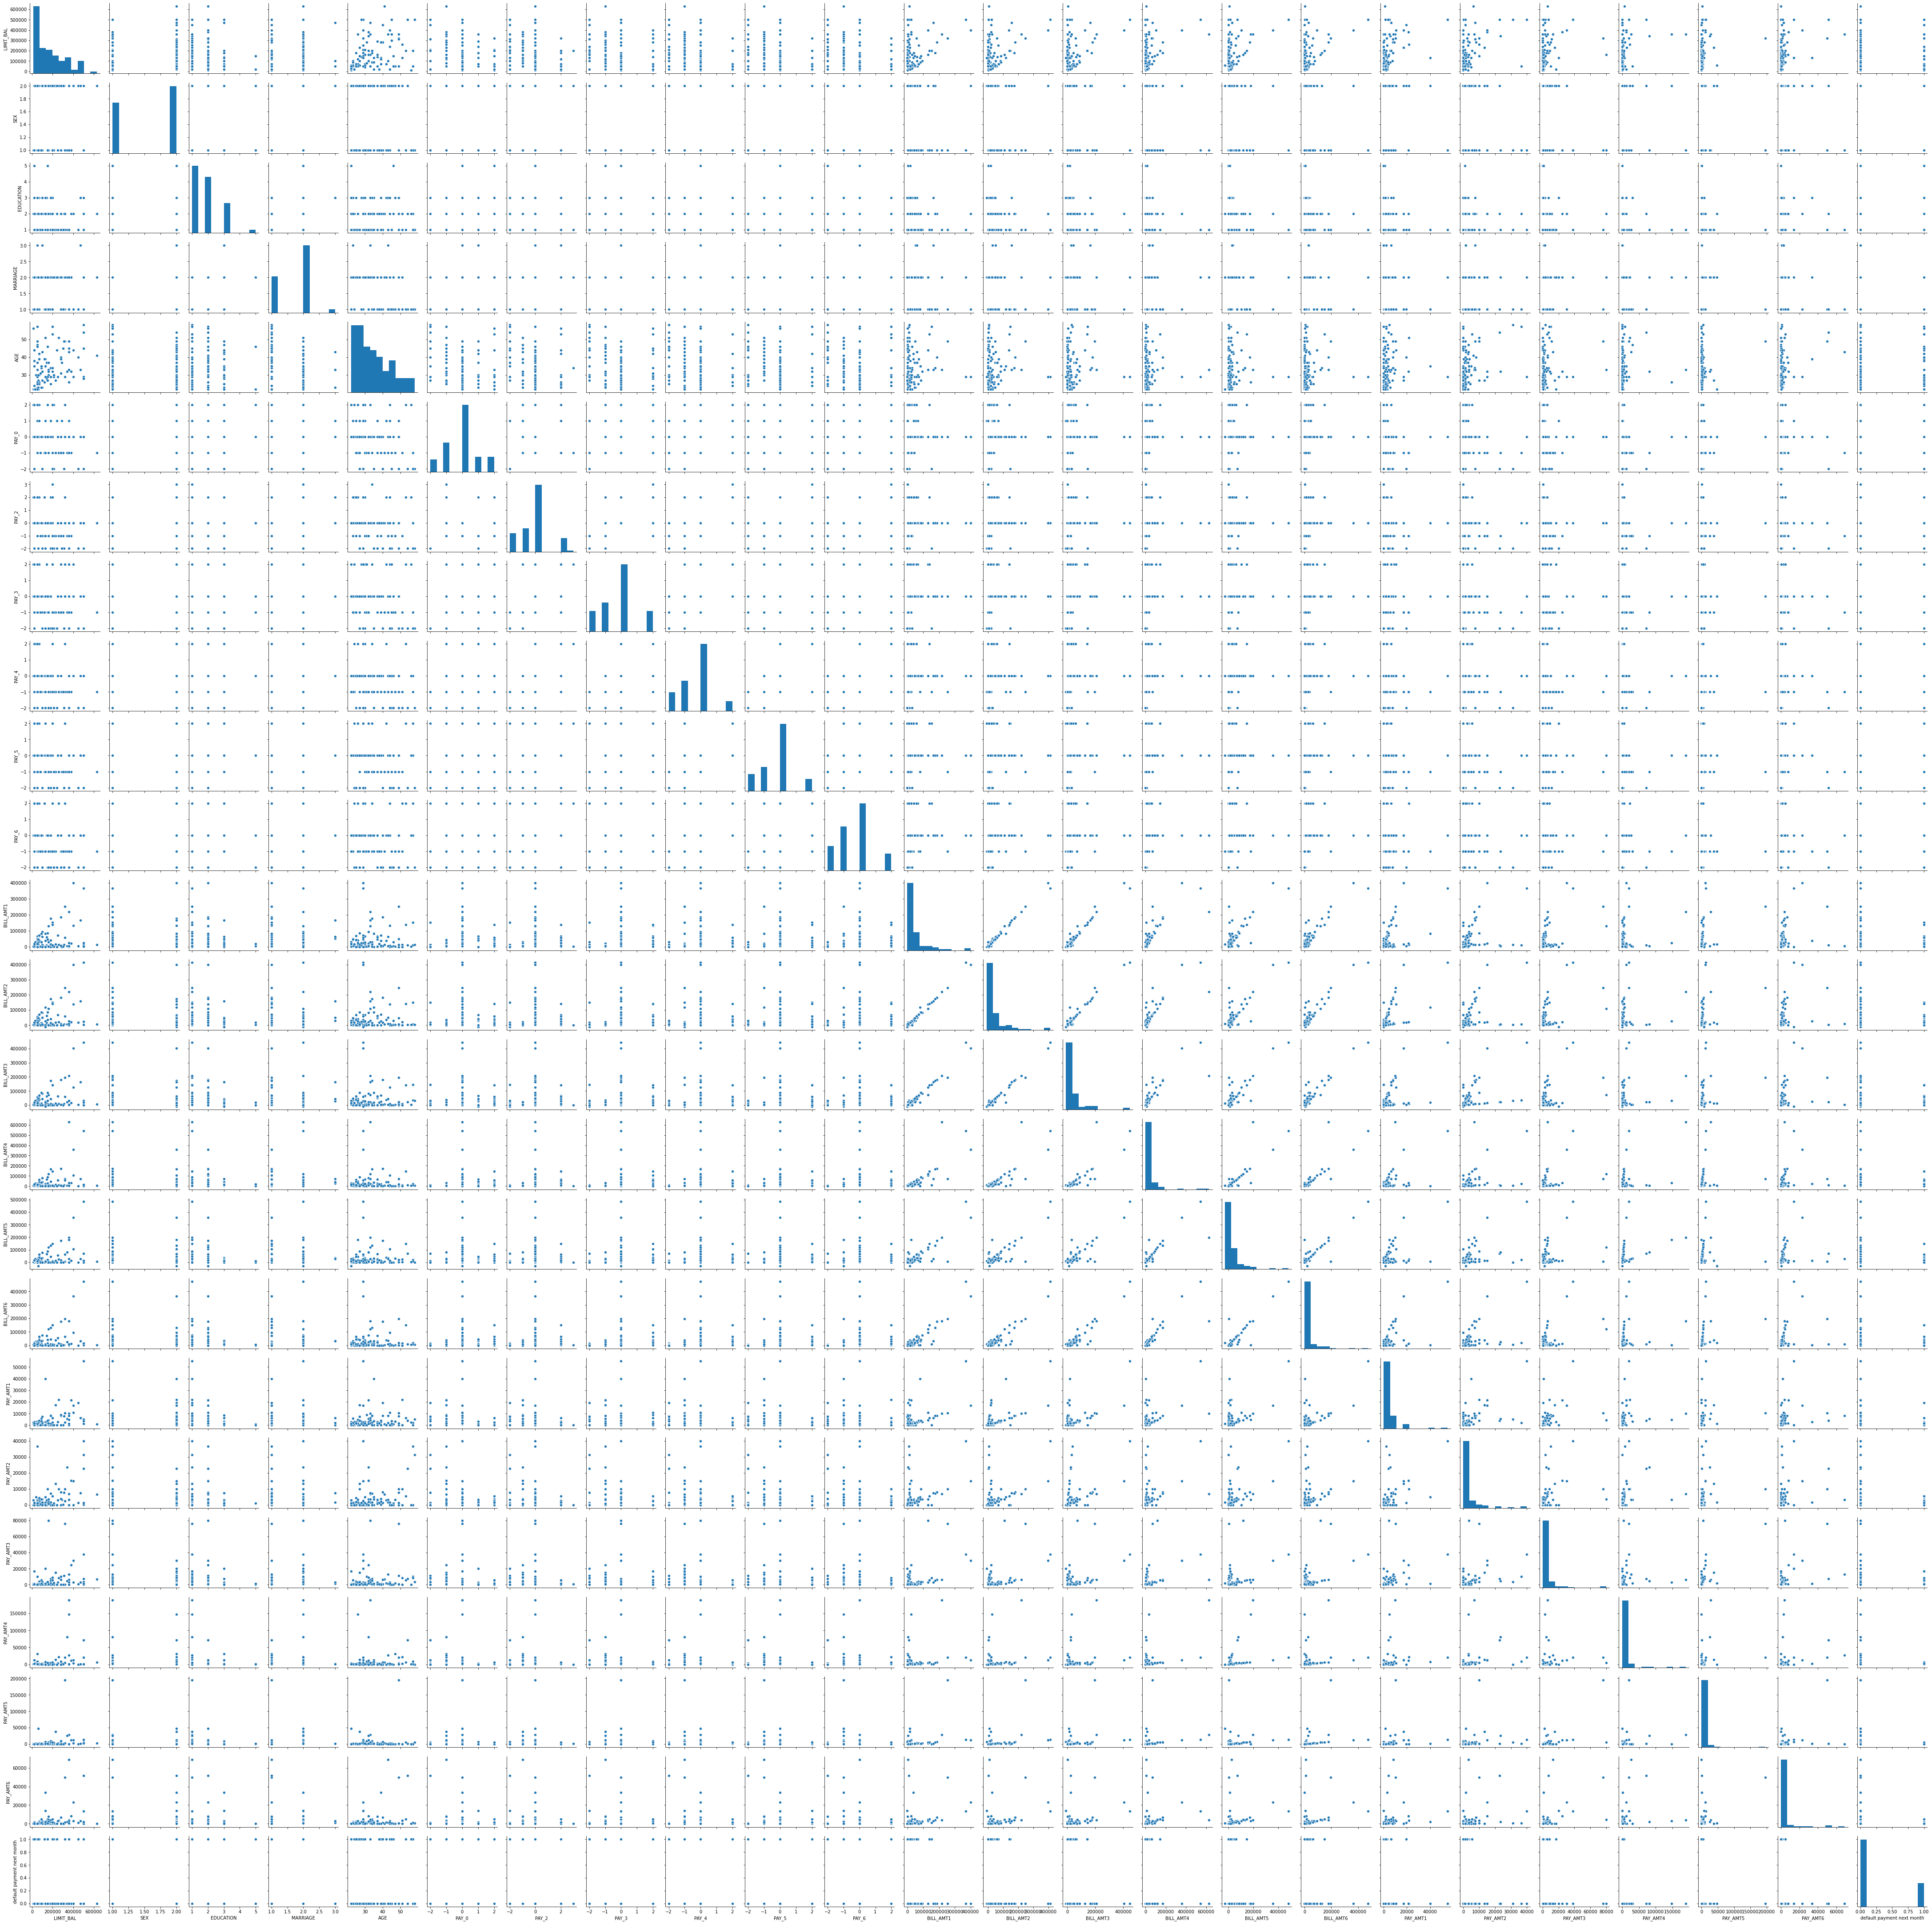

In [35]:
sns.pairplot(data)

from the above graph we can see some linear relations between features in the dataset.Lets see in heatmap.

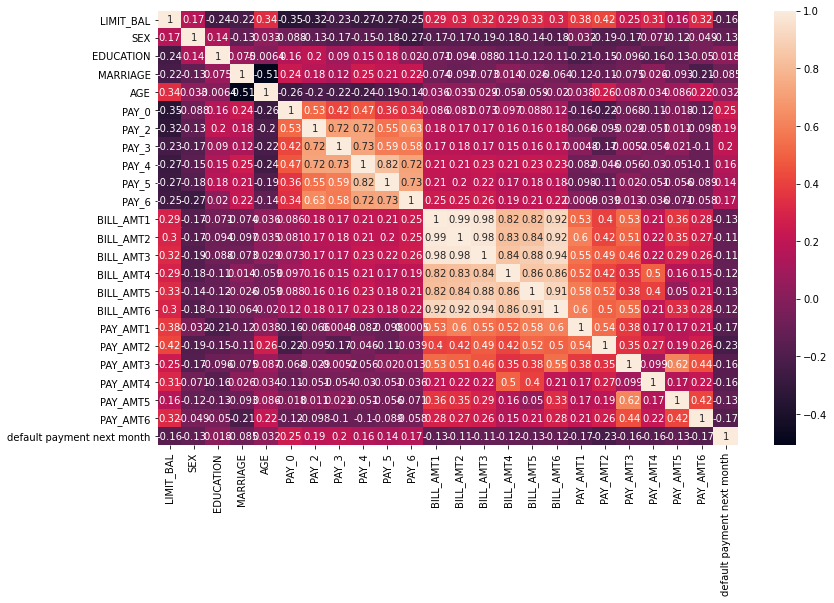

In [36]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),annot=True)

From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent. 

But in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation. 


### Let's create clusters

In [6]:
X = data.drop(labels=['default payment next month'],axis=1)
Y = data['default payment next month']

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=69)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[33327741518660.35, 19412184658395.15, 10888789547796.672, 7565336742807.486, 6105533488019.835, 4966929480393.806, 4183934857944.9844, 3445444390496.8276, 2947659334747.747, 2498596049605.456]


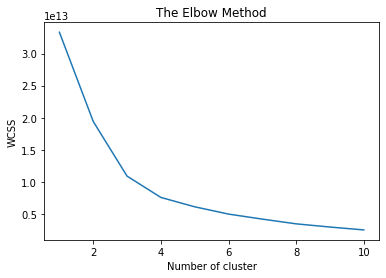

By looking to graph elbow is between 3-4.Let's take number of clusters as 3

In [10]:
cluster = KMeans(n_clusters=3,init='k-means++',random_state=8)
cluster_prediction = cluster.fit_predict(X)

In [11]:
print(cluster_prediction)

[0 0 0 0 0 0 2 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 2 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 2 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 1 0 2 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 2 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 2 1 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 2 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 2 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1
 1 0 1 0 0 1 0 0 0 1 1 0 

In [12]:
X['clusters'] = cluster_prediction
X['Labels'] = Y

In [13]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,clusters,Labels
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


Here we will perform operations on only cluster and compair different algoriths.In pycham we simply apply for loop for other clusters.

### For cluster 0

In [14]:
cluster0_data = X[X['clusters']==0]
cluster0_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,clusters,Labels
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


In [15]:
cluster0_data_features = cluster0_data.drop(labels=['Labels'],axis=1)
cluster0_data_Label = cluster0_data['Labels']

cluster0_data_features

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,clusters
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,60000,2,2,2,23,0,0,0,0,0,...,19595,19209,19323,1937,1301,682,690,816,835,0
595,90000,1,2,2,35,0,0,0,0,0,...,35565,30942,30835,3621,3597,1179,1112,1104,1143,0
597,150000,1,1,2,27,0,0,0,0,0,...,89775,87725,40788,4031,10006,3266,4040,1698,800,0
598,50000,2,3,1,22,0,0,0,0,0,...,13150,8866,7899,1411,1194,379,281,321,197,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(cluster0_data_features,cluster0_data_Label,test_size=0.30,random_state=33)

In [18]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,clusters
161,70000,1,2,1,39,0,0,0,0,0,...,16518,14096,830,4025,2095,1000,2000,3000,0,0
101,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
389,20000,1,3,2,44,2,2,0,0,0,...,10488,12314,11970,0,1651,1000,2000,0,1500,0
246,20000,2,1,2,22,0,0,2,-1,0,...,16341,16675,0,3000,0,16741,334,0,0,0
502,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,70000,1,2,2,30,1,2,2,0,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,0
98,50000,2,3,1,22,0,0,0,0,0,...,13150,8866,7899,1411,1194,379,281,321,197,0
316,20000,1,1,2,24,0,0,2,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,0
572,200000,2,2,1,32,-1,-1,-1,-1,2,...,5247,3848,3151,5818,15,9102,17,3165,1395,0


In [19]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [20]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'clusters'],
      dtype='object')

In [21]:
X_train = pd.DataFrame(SS.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(SS.fit_transform(X_test), columns = X_test.columns, index = X_test.index)

In [22]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,clusters
161,-0.370562,-1.131371,0.007463,-1.782999,0.965899,-0.168421,0.050611,0.050871,0.206372,0.103844,...,-0.127999,-0.182621,-0.743576,0.329702,0.099694,-0.200105,0.155684,0.152869,-0.383280,0.0
101,0.489455,0.883883,0.007463,0.426369,-0.707934,-1.189697,1.973830,0.050871,0.206372,0.103844,...,-0.710309,-0.650403,-0.629635,-0.506664,-0.226556,-0.200105,-0.177614,-0.374507,0.029293,0.0
389,-1.230579,-1.131371,1.070955,0.426369,1.609680,1.874131,1.973830,0.050871,0.206372,0.103844,...,-0.393085,-0.260958,-0.221444,-0.506664,-0.032594,-0.200105,0.155684,-0.374507,-0.073850,0.0
246,-1.230579,0.883883,-1.056029,0.426369,-1.222960,-0.168421,0.050611,1.863146,-0.790509,0.103844,...,-0.135780,-0.069247,-0.782478,0.116715,-0.524502,1.390416,-0.399590,-0.374507,-0.383280,0.0
502,-0.026555,0.883883,0.007463,0.426369,0.322117,-0.168421,0.050611,0.050871,0.206372,0.103844,...,-0.224142,-0.145166,-0.053697,-0.191234,-0.077584,-0.200105,-0.177614,-0.198715,0.648152,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,-0.370562,-1.131371,0.007463,0.426369,-0.192909,0.852855,1.973830,1.863146,0.206372,0.103844,...,2.081664,0.786309,0.946743,0.158273,-0.524502,0.001981,0.488981,-0.110819,-0.383280,0.0
98,-0.714568,0.883883,1.070955,-1.782999,-1.222960,-0.168421,0.050611,0.050871,0.206372,0.103844,...,-0.276060,-0.412533,-0.412252,-0.213468,-0.168755,-0.262853,-0.417254,-0.318077,-0.342642,0.0
316,-1.230579,-1.131371,-1.056029,0.426369,-0.965447,-0.168421,0.050611,1.863146,2.200135,2.076883,...,-0.047990,-0.015176,0.112926,0.158273,-0.524502,-0.149584,-0.510911,-0.084450,-0.383280,0.0
572,1.865482,0.883883,0.007463,-1.782999,0.064604,-1.189697,-0.910998,-0.855266,-0.790509,2.076883,...,-0.623485,-0.633126,-0.634790,0.702275,-0.520033,0.618547,-0.505245,0.181875,-0.095511,0.0


#### Let's use GaussianNB (naive_bayes)

In this dataset hence we can't reduce columns so we are considering them all features are independently contributing to output/Labels.

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [24]:
pridect_Y = gnb.fit(X_train,Y_train).predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
acc = accuracy_score(Y_test,pridect_Y)
print(acc)

0.6504065040650406


65% accuracy is very low, Let's see if we can increase Accuracy score

#### Let's Use GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    'var_smoothing':[0.001,0.1,1,0.005,0.05,1e-8,1e-9,1e-10,1e-11]
}
grid = GridSearchCV(estimator=gnb,param_grid=param_grid,cv=5,verbose=3)

In [29]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.632, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.684, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.509, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.632, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.719, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.509, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. var_smoothing=0.005, score=0.509, total=   0.0s
[CV] var_smoothing=0.005 .............................................
[CV] ................. var_smoothing=0.005, score=0.632, total=   0.0s
[CV] var_smoothing=0.005 .............................................
[CV] ................. var_smoothing=0.005, score=0.719, total=   0.0s
[CV] var_smoothing=0.05 ..............................................
[CV] .................. var_smoothing=0.05, score=0.526, total=   0.0s
[CV] var_smoothing=0.05 ..............................................
[CV] .................. var_smoothing=0.05, score=0.614, total=   0.0s
[CV] var_smoothing=0.05 ..............................................
[CV] .................. var_smoothing=0.05, score=0.456, total=   0.0s
[CV] var_smoothing=0.05 ..............................................
[CV] .................. var_smoothing=0.05, score=0.526, total=   0.0s
[CV] var_smoothing=0.05 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.001, 0.1, 1, 0.005, 0.05, 1e-08,
                                           1e-09, 1e-10, 1e-11]},
             verbose=3)

In [30]:
grid.best_estimator_

GaussianNB(var_smoothing=0.001)

Now, lets create a model with best parameters.

In [31]:
gnb_new = GaussianNB(var_smoothing=0.001)

In [32]:
Y_pred_new = gnb_new.fit(X_train,Y_train).predict(X_test)

In [33]:
acc_new = accuracy_score(Y_test,Y_pred_new)
acc_new

0.6178861788617886

In [35]:
!pip install xgboost

In [37]:
from xgboost import XGBClassifier
Xgb = XGBClassifier(objective='binary:logistic')

In [46]:
params_Xgb = {
    'n_estimators': [15,20,30,50,100,150],
    'max_depth':[2,3,4,5]
}

grid_xgb = GridSearchCV(estimator=Xgb,param_grid=params_Xgb,verbose=3,cv=5,n_jobs=-1)

In [47]:
grid_xgb.fit(X_train,Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.1s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [48]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
xgb_new = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [60]:
xgb_predict_Y

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, silent=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=1)

In [62]:
xgb_predict_Y=xgb_new.fit(X_train,Y_train).predict(X_test)

In [63]:
acc_xgb = accuracy_score(Y_test,xgb_predict_Y)
acc_xgb

0.9349593495934959

#### !!!!Great just with playing with 2 parameters of xgboost we got such a good score...

In end to end project we will compair score of all algorithems/tecq. and then which ever's score is more we will apply that algorithm to that cluster.

sence there are many clusters will be iterate each algorithm/tecq. with each cluster,that will give the best score for each cluster.